# PREDICTING HEART DISEASE 

## This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## We're going to take the following approach:

    `Problem definition
    Data
    Evaluation
    Features
    Modelling
    Experimentation`

## 1. Problem Definition

In a statement,

    Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci
## 3. Evaluation

    If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [1]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#want plot inside notebook
%matplotlib inline

#models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#MODEL EVALUATION

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,plot_roc_curve,recall_score,classification_report


# Loading data

In [2]:
df=pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploring Data

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

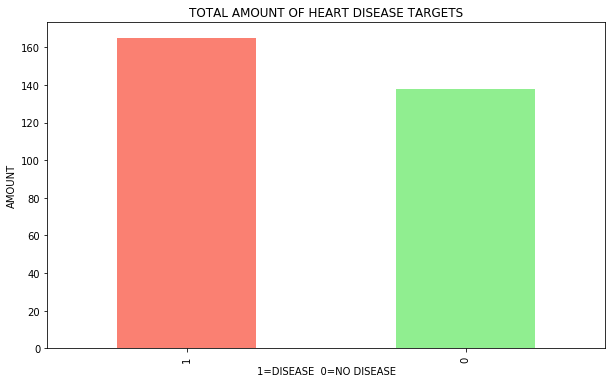

In [6]:
plt.title("TOTAL AMOUNT OF HEART DISEASE TARGETS")
plt.xlabel("1=DISEASE  0=NO DISEASE")
plt.ylabel("AMOUNT")
df["target"].value_counts().plot(kind='bar',color=['salmon','lightgreen'],figsize=(10,6));



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


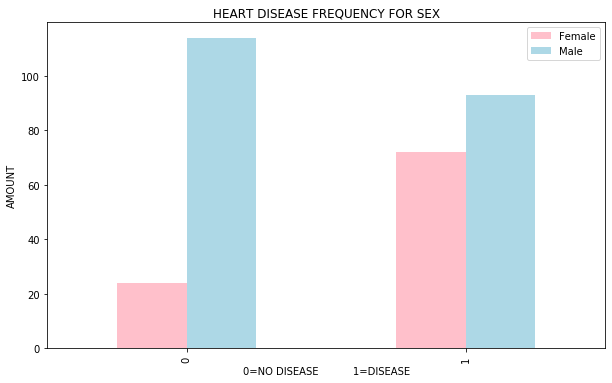

In [12]:
pd.crosstab(df["target"],df["sex"]).plot(kind='bar',color=['pink','lightblue'],figsize=(10,6));
plt.title("HEART DISEASE FREQUENCY FOR SEX")
plt.xlabel("0=NO DISEASE           1=DISEASE")
plt.ylabel("AMOUNT")
plt.legend(["Female","Male"]);

**AGE VS MAX RATE OF HEART DISEASE**

In [13]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

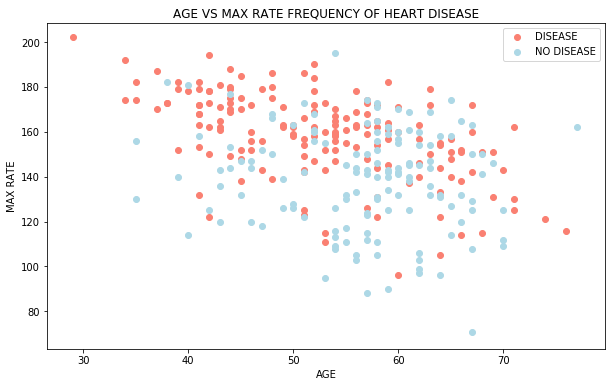

In [14]:
plt.figure(figsize=(10,6))
plt.title("AGE VS MAX RATE FREQUENCY OF HEART DISEASE")
plt.xlabel("AGE")
plt.ylabel("MAX RATE")
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='salmon');
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='lightblue');
plt.legend(["DISEASE","NO DISEASE"])

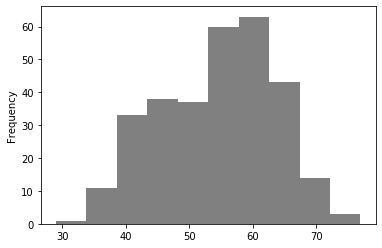

In [15]:
df.age.plot.hist(color='grey');

**HEART RATE ACCORDING TO CHEST PAIN**

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


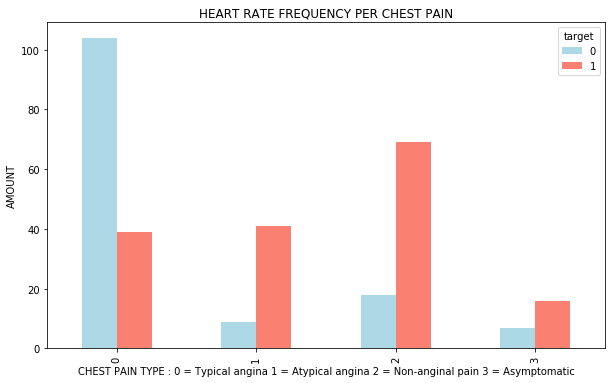

In [17]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['lightblue','salmon'],figsize=(10,6))
plt.title("HEART RATE FREQUENCY PER CHEST PAIN")
plt.xlabel("CHEST PAIN TYPE : 0 = Typical angina 1 = Atypical angina 2 = Non-anginal pain 3 = Asymptomatic")
plt.ylabel("AMOUNT");

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
corr_mat=df.corr()
corr_mat

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


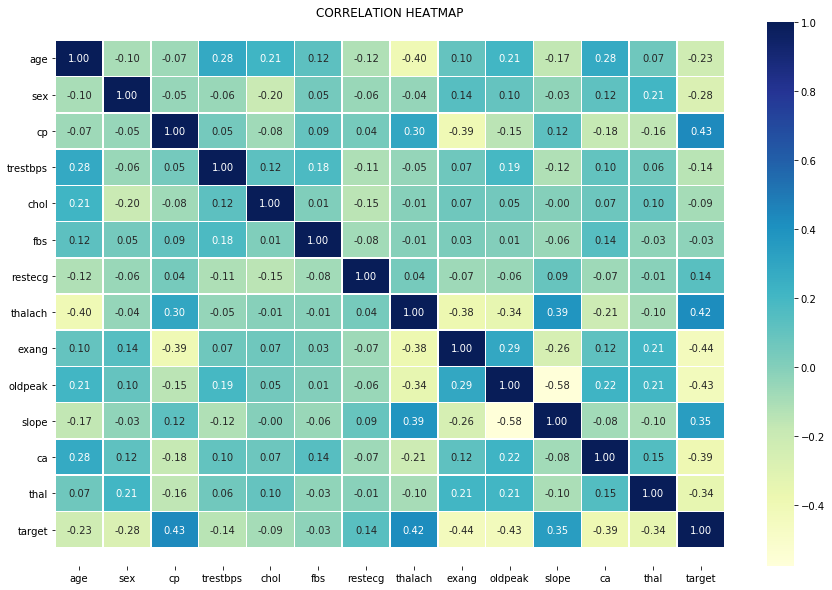

In [20]:
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')
ax.set(title="CORRELATION HEATMAP");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5);


# Modelling

In [21]:
#splitting data into X and y
X=df.drop("target",axis=1)
y=df.target

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
np.random.seed(42)
#splitting data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Trying different diffrent ways

In [26]:
np.random.seed(42)
from sklearn import svm
lin_clf = svm.LinearSVC(max_iter=1000000)
lin_clf.fit(X_train,y_train)
lin_clf.score(X_test,y_test)*100

C:\Users\hvika\anaconda3.x\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


88.52459016393442

In [27]:
np.random.seed(42)
log_reg=LogisticRegression(max_iter=670)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)*100

85.24590163934425

In [28]:
np.random.seed(42)
r_clf=RandomForestClassifier()
r_clf.fit(X_train,y_train)
r_clf.score(X_test,y_test)*100

83.60655737704919

In [29]:
np.random.seed(42)
k_clf=KNeighborsClassifier()
k_clf.fit(X_train,y_train)
k_clf.score(X_test,y_test)*100

68.85245901639344

In [30]:
models={"LOGISTIC REGRESSION":LogisticRegression(max_iter=670),
        "KNN":KNeighborsClassifier(),
        "RANDOMFOREST":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    models_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        models_score[name]=model.score(X_test,y_test)*100
    return models_score
model_score=fit_and_score(models,X_train,X_test,y_train,y_test)

In [31]:
model_score

{'LOGISTIC REGRESSION': 85.24590163934425,
 'KNN': 68.85245901639344,
 'RANDOMFOREST': 83.60655737704919}

In [32]:
model_compare=pd.DataFrame(model_score,index=["accuracy"])

In [33]:
model_compare

,LOGISTIC REGRESSION,KNN,RANDOMFOREST
accuracy,85.245902,68.852459,83.606557


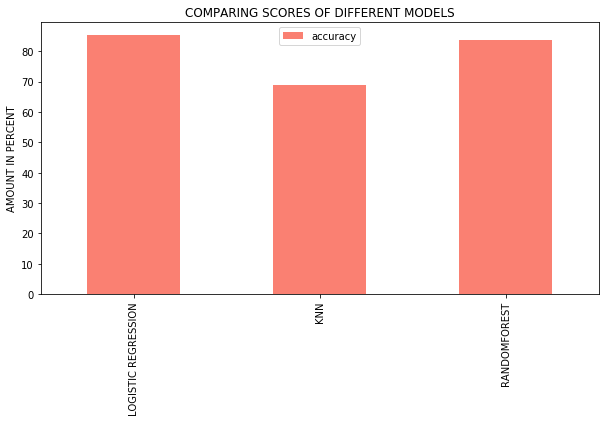

In [34]:
model_compare.T.plot(kind='bar',figsize=(10,5),color=["salmon"]);
plt.title("COMPARING SCORES OF DIFFERENT MODELS")
plt.ylabel("AMOUNT IN PERCENT");

In [35]:
y_pred=log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [37]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.85        29\n           1       0.87      0.84      0.86        32\n\n    accuracy                           0.85        61\n   macro avg       0.85      0.85      0.85        61\nweighted avg       0.85      0.85      0.85        61\n'

In [38]:
test_scores=[]
train_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [39]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [40]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

MAXIMUM  SCORE ON TEST DATA IS : 75.41 %


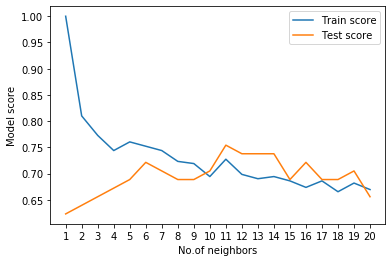

In [46]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("No.of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"MAXIMUM  SCORE ON TEST DATA IS : {max(test_scores)*100:.2f} %")

# Hyperparameter tuning with RandomSearchCV

In [53]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [77]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)
rl_score=rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [78]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)
rr_score=rs_rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished


# Hyperparameter tuning using GridSearchCv

In [75]:
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)
g_Score=gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [74]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [90]:
dic={"LOGISTIC USING RANDOM":rl_score,
     "RANDOMFOREST USING RANDOM":rr_score,
    "LOGISTIC USING GRID":g_Score}

In [95]:
D=pd.DataFrame(dic,index=[0])

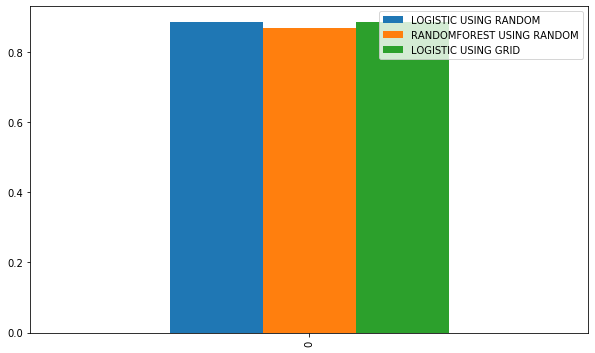

In [98]:
D.plot(kind='bar',figsize=(10,6));

# SO BEST IS LOGISTIC REGRESSION

# NOW EVALUATING OUR MODEL

In [100]:
y_pred=gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

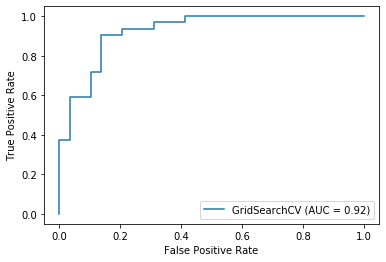

In [103]:
plot_roc_curve(gs_log_reg,X_test,y_test)

In [104]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


In [135]:
sns.set(font_scale=1.5)
def plot_conf_metric(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    bottom,top=ax.get_ylim()
    left,right=ax.get_xlim()
    ax.set_xlim(left-0.2,right+0.2)
    ax.set_ylim(bottom+0.2,top-0.2)
    plt.xlabel("TRUE LABELS")
    plt.ylabel("PREDICTED LABELS") 

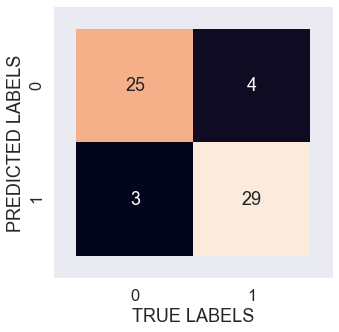

In [136]:
plot_conf_metric(y_test,y_pred)

In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [139]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [140]:
#new classifier
clf=LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [155]:
#accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [156]:
np.mean(cv_acc)

0.8479781420765027

In [144]:
#precision
cv_pre=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [145]:
np.mean(cv_pre)

0.8215873015873015

In [146]:
#recall
cv_re=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_re

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [147]:
np.mean(cv_re)

0.9272727272727274

In [152]:
#f1 score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [153]:
np.mean(cv_f1)

0.8705403543192143

In [160]:
cv_metrics=pd.DataFrame({"ACCURACY":cv_acc,
                        "PRECISION":cv_pre,
                        "RECALL":cv_re,
                        "F1 SCORE":cv_f1},index=[1,2,3,4,5])
cv_metrics

,ACCURACY,PRECISION,RECALL,F1 SCORE
1,0.819672,0.775000,0.939394,0.849315
2,0.901639,0.885714,0.939394,0.911765
3,0.885246,0.861111,0.939394,0.898551
4,0.883333,0.861111,0.939394,0.898551
5,0.750000,0.725000,0.878788,0.794521


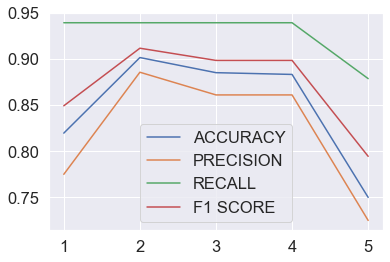

In [161]:
cv_metrics.plot()

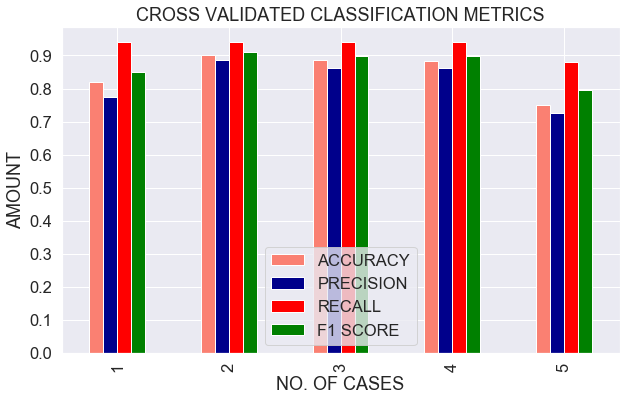

In [178]:
cv_metrics.plot(kind="bar",figsize=(10,6),color=["salmon","darkblue","red","green"])
plt.yticks(np.arange(0,1,0.1));
plt.legend();
plt.title("CROSS VALIDATED CLASSIFICATION METRICS")
plt.xlabel("NO. OF CASES")
plt.ylabel("AMOUNT");

**MOST IMPORTANT FEATURE**

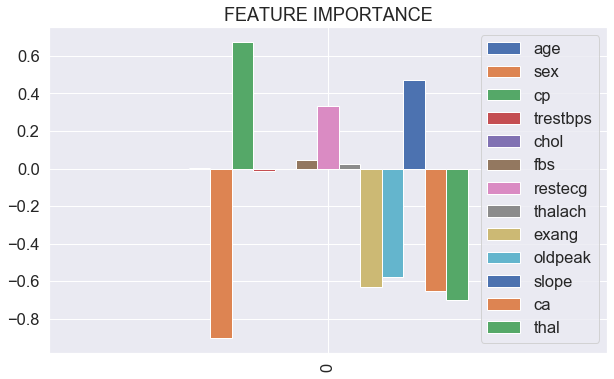

In [184]:
clf.fit(X_train,y_train)
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.plot.bar(title="FEATURE IMPORTANCE",figsize=(10,6));